In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
from scipy.special import erfc

%cd ~/simulations/ARCS/IkedaCarpenter/

/SNS/users/lj7/simulations/ARCS/IkedaCarpenter


In [2]:
class ICG:
    def __init__(self, source, sigma, geom, t0):
        self.source = source
        self.sigma = sigma
        self.geom = geom
        self.t0 = t0
    def ICG(self, t):
        l, l2, l3 = self.geom.l, self.geom.l2, self.geom.l3
        a, b, R = self.source.a, self.source.b, self.source.R
        sigma = self.sigma
        vmin_a = self.vmin(a,t); vmin_b = self.vmin(b, t)
        umin = self.umin(t)
        sqp = np.sqrt(np.pi); sq2 = np.sqrt(2)
        T1 = sigma*l/(l2+l3);  T2_a = np.exp(vmin_a**2 - umin**2)
        C0_a = sqp/sq2*T1*T2_a*erfc(vmin_a)
        C1_a = T1**2 * T2_a * (np.exp(-vmin_a*vmin_a) - sqp*vmin_a * erfc(vmin_a))
        C2_a = sq2 * T1**3 * T2_a * (sqp*(1./2+vmin_a**2)*erfc(vmin_a)-vmin_a*np.exp(-vmin_a**2))
        T2_b = np.exp(vmin_b**2 - umin**2)
        C0_b = sqp/sq2*T1*T2_b*erfc(vmin_b)
        return 1./l/sq2/sqp/sigma*((1-R)*a*a*C2_a + R*a*a*b/(a-b)**3*(2*C0_b-((a-b)**2*C2_a+2*(a-b)*C1_a+2*C0_a)))
    def umin(self, t):
        sigma = self.sigma
        geom = self.geom
        return 1./np.sqrt(2.)/sigma * (geom.l1/geom.l * t - self.t0)
    def vmin(self, x, t):
        sigma = self.sigma
        geom = self.geom
        return self.umin(t) + x/np.sqrt(2) * (sigma*geom.l/(geom.l2+geom.l3))
        
class Source:
    a=b=R = None
class Geom:
    def __init__(self, l1, l2, l3):
        self.l1 = l1
        self.l2 = l2
        self.l3 = l3
        self.l = l1 + l2 + l3
        return    

In [3]:
class source:
    a = 0.45
    b = 0.04
    R = .65
geom = Geom(l1=11.6, l2=2.0, l3=3.)
icg = ICG(source, 5., geom, 0.)

In [4]:
t = np.arange(-100, 100, 1.)

<IPython.core.display.Javascript object>


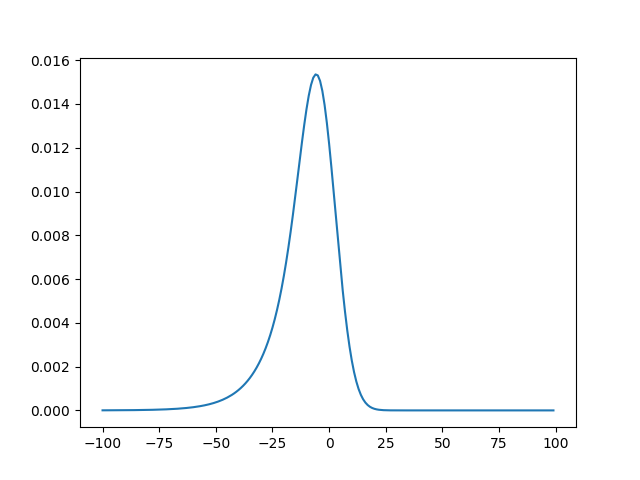

In [5]:
plt.figure()
plt.plot(t, icg.ICG(t))